<a href="https://colab.research.google.com/github/alinaalborova/nlp_course/blob/master/Lab2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Майнор "Интеллектуальный анализ данных"
# Курс "Современные методы машинного обучения"
# Лабораторная работа №2. Распознование одежды.

В данной лабораторной работе вам предлагается обучить модель на основе нейронной сети для распознавания типов одежды и сравнить ее с "классическими" моделями.

## Данные

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
X_train, y_train = load_mnist('data', kind='train')
X_test, y_test = load_mnist('data', kind='t10k')

In [0]:
print('X_train shape:', X_train.shape, 'y_train shape:', y_train.shape, 'type', type(X_train))
print('X_test shape:', X_test.shape, 'y_test shape', y_test.shape, 'type', type(X_test))

X_train shape: (60000, 784) y_train shape: (60000,) type <class 'numpy.ndarray'>
X_test shape: (10000, 784) y_test shape (10000,) type <class 'numpy.ndarray'>


Каждая строка в `X_train`, `X_test` - векторизованное монохромное изображение размерности  28×28  
Каждая строка в `y_train`, `y_test` - метка класса для соответсвующей строчки из `X_train`, `X_test`


In [0]:
labels_map  = pd.read_csv('data/labels_map.csv', index_col='Label')

Для каждого объекта из обучающей и тестовой выборки назначен один из следующих классов:

In [0]:
labels_map

,Description
Label,
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag


In [0]:
pic_id = 35
some_pic = X_train[pic_id]
pic_label = y_train[pic_id]

In [0]:
print('Letter class:', pic_label, '-', labels_map.loc[pic_label, 'Description'])

Letter class: 8 - Bag


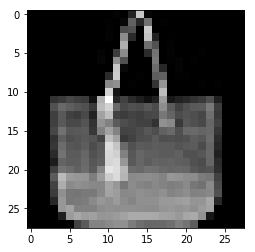

In [0]:
plt.imshow(some_pic.reshape((28, 28)), cmap='gray')
plt.show()

## Задания

Обучение неоходимо проводить на данных из `X_train`, качество модели проверять на данных из файла `X_test`.
Для моделирования желательно использовать библиотеки `keras` и `tensorflow`.  

Оценивать качество моделей нужно следующим образом:  
1. Построить кривую ROC  
2. Посчитать ROC AUC  
3. Построить кривую Precision - Recall  
4. Вывести `classification_report` из `sklearn.metrics`  
5. Посчитать confussion matrix  

### Задание 1

Обучите классический алгоритм машинного обучения для этих данных (например, SVM, Random Forest или Gradient Boosting Trees), используя интенсивности пикселей в качестве входного вектора для классификации. Оцените ошибку.  
**(max 3 балла)**

### Задание 2

1. Построить и обучить модели с 2-мя и 3-мя полносвязными (dense) скрытыми слоями.
2. Попробовать разные параметры нейронной сети - число нейронов на каждом слое, learning rate, batch size, функции активации, регуляризации и т.д. 
3. Оценить качество моделей с различными параметрами, выбрать наилучшую из рассмотренных моделей.

В начале можетбыть полезно ознакомиться с [руководством по созданию последовательных моделей в Keras](https://keras.io/getting-started/sequential-model-guide).  
А так же с [функциональным API keras](https://keras.io/getting-started/functional-api-guide). 
Создание последовательных моделей немного проще, в то время как функциональное API предоставляет больше гибкости. Для целей лабораторной работы подойдет любое.  
**(max 4 балла)**

### Задание 3

1. Найти 5 пар классов, которые чаще всего путаются между собой - объяснить с логической точки зрения почему. Привести примеры с картинками, которые были детектированы с ошибкой.
2. Насколько равномерно обучилась ваша модель, а именно все ли классы определяются с примерно одинаковой точностью? Приведите доказательства вашей точки зрения, а также классы с самым лучшим и с самым худшим процентом детекции (точностью детекции).  
**(max 2 балла)**

### Задание 4

Попробовать другие возможные архитектуры: большее/меньшее количество слоёв, свёрточные слои, использование весов из предобученных моделей и т.д. На сколько получится улучшить результат?  
**(max 3 балла)**